In [7]:
##################################################################
#       ENV717 - S2021                                           #                            
#       This script analyzes the demand of PJM in 2019           #
##################################################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### OPTIONAL (UNNECESSARY) STEPS MARKED WITH *
### INCLUDED TO HELP YOU REMEMBER a Python concept

##################################################################################################################
## 1. Read the demand file                                                                                       #
##   -Read the first row (i.e., row 0) as the headers                                                            #
## 2. See the columns in this spreadsheet by printing the first five rows                                                #
###################################################################################################################
demand=pd.read_excel("C://Users//dp52//In USE//Classes//Markets for electricity//2021//A2 hrl_dmd_bids PJM 2019.xlsx",keep_default_na=False,header=0) #1.
demand.head(5) #2.

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
0,2020-01-01 04:00:00,2019-12-31 23:00:00,PJM_RTO,82421
1,2020-01-01 03:00:00,2019-12-31 22:00:00,PJM_RTO,86599
2,2020-01-01 02:00:00,2019-12-31 21:00:00,PJM_RTO,90102
3,2020-01-01 01:00:00,2019-12-31 20:00:00,PJM_RTO,93359
4,2020-01-01 00:00:00,2019-12-31 19:00:00,PJM_RTO,94734


In [8]:
##################################################################################################################
# *see how many rows in the database - not counting the row with the headers
len(demand)

8760

In [9]:
# We saw thare are 8760 so we have one demand value per hour
# *check the types of the columns
demand.dtypes

datetime_beginning_utc    datetime64[ns]
datetime_beginning_ept    datetime64[ns]
area                              object
hrly_da_demand_bid                 int64
dtype: object

In [10]:
##################################################################################################################
## We see there are two columns for time: 1. UTC, 2. EPC. EPC is the one we want                                 #
## pd already identified the UTC and EPT columns as datetime values - that is good
# Also, the names of the columns are a bit long for us to manipulate - let's see them again
demand.columns

Index(['datetime_beginning_utc', 'datetime_beginning_ept', 'area',
       'hrly_da_demand_bid'],
      dtype='object')

In [11]:
## We can get rid of the data on the utc column and the area column, so we end with just time and demand
# *but first let's rename the columns
demand.columns=['utc', 'time','area','demand']
demand.columns

Index(['utc', 'time', 'area', 'demand'], dtype='object')

In [12]:
# Now let's keep only time and demand
# We will use the pandas.DataFrame.loc which uses the labels of the columns or rows
demand=demand.loc[:,['time','demand']]  # this keeps all the rows in those two columns
demand.head(5)

,time,demand
0,2019-12-31 23:00:00,82421
1,2019-12-31 22:00:00,86599
2,2019-12-31 21:00:00,90102
3,2019-12-31 20:00:00,93359
4,2019-12-31 19:00:00,94734


In [13]:
# We see the demand is sorted such that the last hour of the year appears first
# let's sort it so that the first hour of 2019 is first row
# we can use pandas.DataFrame.sort_values - we do not need more arguments than the name of the column because 
# this, by default, sorts values in ascending order
demand=demand.sort_values('time')

In [14]:
# we can check that the values are now sorted
demand.head(5)

,time,demand
8759,2019-01-01 00:00:00,71887
8758,2019-01-01 01:00:00,69320
8757,2019-01-01 02:00:00,67886
8756,2019-01-01 03:00:00,67251
8755,2019-01-01 04:00:00,67823


In [15]:
# To have a nice label for the hours on the x axis, lets create a new column that labels each observation from 1 to 8761
demand['hour']=np.arange(1,8761)
demand.head(5)

,time,demand,hour
8759,2019-01-01 00:00:00,71887,1
8758,2019-01-01 01:00:00,69320,2
8757,2019-01-01 02:00:00,67886,3
8756,2019-01-01 03:00:00,67251,4
8755,2019-01-01 04:00:00,67823,5


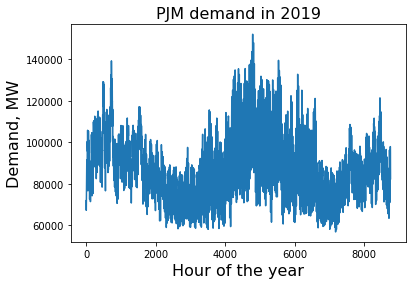

In [16]:
# Now we can plot the hour of the year on the x axis and the demand on the y axis
plt.plot(demand['hour'],demand['demand'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2019', fontsize=16)
plt.show()

In [17]:
# Now lets look at the distribution of the demand by looking at some key percentiles
print('In 2019, 99% of the hours had a demand higher than',np.percentile(demand['demand'],1),'MW')
print('         50% of the hours had a demand higher than',np.percentile(demand['demand'],50),'MW')
print('         30% of the hours had a demand higher than',np.percentile(demand['demand'],70),'MW')
print('         10% of the hours had a demand higher than',np.percentile(demand['demand'],90),'MW')
print('         5% of the hours had a demand higher than',np.percentile(demand['demand'],95),'MW')
print('         1% of the hours had a demand higher than',np.percentile(demand['demand'],99),'MW')

In 2019, 99% of the hours had a demand higher than 60591.03 MW
         50% of the hours had a demand higher than 86665.0 MW
         30% of the hours had a demand higher than 95497.1 MW
         10% of the hours had a demand higher than 111018.30000000002 MW
         5% of the hours had a demand higher than 120025.15 MW
         1% of the hours had a demand higher than 132235.99 MW


In [18]:
# Let's fix it so that we only report 2 decimal points
# write '%.2f'% right before the value
print('In 2019, 99% of the hours had a demand higher than','%.2f' % np.percentile(demand['demand'],1),'MW')np.percentile(demand['demand'],50),'MW')
print('         30% of the hours had a demand higher than',np.percentile(demand['demand'],70),'MW')
print('         10% of the hours had a demand higher than',np.percentile(demand['demand'],90),'MW')
print('         5% of the hours had a demand higher than',np.percentile(demand['demand'],95),'MW')
print('         1% of the hours had a demand higher than',np.percentile(demand['demand'],99),'MW')

SyntaxError: invalid syntax (<ipython-input-18-2edef18e1ec9>, line 3)

In [20]:
# Now let's build the (empirical) CDF of the demand
demand_sorted=demand.sort_values('demand') # sorts from least demand to highest demand
demand_sorted.head(5)

,time,demand,hour
1580,2019-10-27 04:00:00,56841,7180
1581,2019-10-27 03:00:00,56927,7179
1582,2019-10-27 02:00:00,57573,7178
1558,2019-10-28 02:00:00,58014,7202
5250,2019-05-27 06:00:00,58086,3510


In [30]:
#Now, let's create and array that has the percentile corresponding to each (ordered) demand value
#The 8760th demand value will be the percentile 100 or have a CDF of 1
#The 876th demand value will be the percentile 10 or have a CDF of 0.1
#let's first remember how to use np.array - np.array(range(N)) creates an array of elements 0, 1, 2,..N
# for example
a=np.array(range(5))
print("The array a that we just created is",a[:])


The array a that we just created is [0 1 2 3 4]


In [52]:
CDF=np.array(range(8760))
print("The first elements of the CDF array are", CDF[0:6])
print("The last elements of the CDF array are",CDF[8755:8760])

The first elements of the CDF array are [0 1 2 3 4 5]
The last elements of the CDF array are [8755 8756 8757 8758 8759]


In [53]:
# Now we adjust CDF so the first element has 1, the second has 2 etc.. by adding 1
CDF=CDF+1
print("The first five elements of the adjusted CDF array are",CDF[0:6])

The first five elements of the adjusted CDF array are [1 2 3 4 5 6]


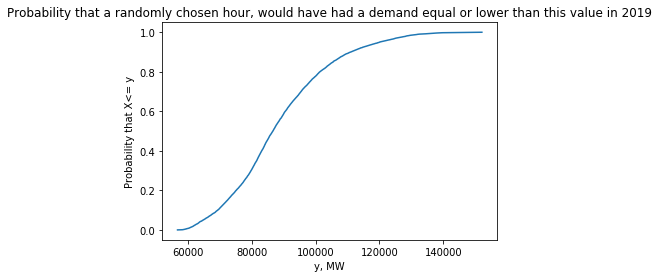

In [54]:
CDF = CDF/float(8760)
plt.plot(demand_sorted['demand'], CDF)
plt.xlabel('y, MW')
plt.ylabel('Probability that X<= y')
plt.title('Probability that a randomly chosen hour, would have had a demand equal or lower than this value in 2019')
plt.show()